https://www.notion.so/project_1-2_team-B_hui_250116-968fbe89aa4346139100fff1a00927e3

In [1]:
# 라이브러리 설치
!pip install koreanize-matplotlib
!pip install youtube-transcript-api
!pip install google-api-python-client pandas isodate
!pip install pytrends
!pip install pytrends matplotlib
!pip install beautifulsoup4 requests
!pip install konlpy

# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt install fonts-nanum fonts-nanum-extra
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 39.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 3s (11.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124565 files and directories curr

테크뷰 - 노션 리뷰(1개)

In [50]:
##v1.0 노션 리뷰 최초 1페이지만 스크레이핑 하는 코드

# import requests
# import pandas as pd

# # 요청 URL 및 파라미터
# url = "https://api.reviewinsight.co.kr/api/software/191/reviews?id=191&page=1&limit=10"


# # API 요청
# response = requests.get(url)
# if response.status_code == 200:
#     data = response.json()
#     items = data.get("data", {}).get("items", [])



#     # 데이터프레임으로 변환
#     reviews = []
#     for item in items:
#         review = {
#             "Review ID": item.get("id"),
#             "Company Name": item.get("basicInfo", {}).get("companyName"),
#             "Rating": item.get("rating"),
#             "Comment": item.get("comment"),
#             "Pros": item.get("pros"),
#             "Cons": item.get("cons"),
#         }

#         # 상세 리뷰 답변 추가
#         answers = item.get("answers", [])
#         for answer in answers:
#             feature = answer.get("feature")
#             score = answer.get("score")
#             review[f"reviewQuestion_{feature}"] = answer.get("reviewQuestion")  # 열 이름 동적 생성
#             review[f"Feature: {feature}"] = score


#         reviews.append(review)

#     # 데이터프레임 생성
#     df = pd.DataFrame(reviews)

#     # 데이터프레임 출력
#     print("스크레이핑한 데이터:")
#     print(df)

#     # 데이터 저장
#     df.to_csv("reviews.csv", index=False, encoding="utf-8-sig")
#     print("데이터가 reviews.csv로 저장되었습니다.")
# else:
#     print(f"API 요청 실패: {response.status_code}")


테크뷰 - 노션 리뷰(여러페이지)

In [ ]:
import pandas as pd
import time
import requests

# 데이터 수집 함수
def fetch_data(base_url, params):
    all_reviews = []
    page = 1

    while True:
        # 페이지 번호 갱신
        params['page'] = page

        # 데이터 요청
        response = requests.get(base_url, params=params)
        if response.status_code != 200:
            print(f"Error: Unable to fetch data. Status Code: {response.status_code}")
            break

        # JSON 응답 파싱
        data = response.json()
        total_pages = data['data'].get('lastPage', 1)
        reviews = data['data'].get('items', [])

        if not reviews:  # 더 이상 데이터가 없으면 종료
            print("No more data to fetch.")
            break

        # 데이터 수집
        for review in reviews:
            basic_info = review['basicInfo']
            category_info = review['categoryInfo']
            for answer in review['answers']:
                all_reviews.append({
                    "Review ID": review['id'],
                    "Company Name": basic_info['companyName'],
                    "Industry": basic_info['industry'],
                    "Job": basic_info['job'],
                    "Using Count": basic_info['usingCount'],
                    "Category": category_info['categoryTitle'],
                    "Sub-Category": category_info['subCategoryTitle'],
                    "Comment": review['comment'],
                    "Cons": review['cons'],
                    "Pros": review['pros'],
                    "Rating": review['rating'],
                    "Software Name": review['softwareName'],
                    "Feature": answer['feature'],
                    "Review Question": answer['reviewQuestion'],
                    "Origin Score": answer['originScore'],
                    "Score": answer['score']
                })

        # 현재 페이지 수집 완료 메시지
        print(f"Page {page} of {total_pages} collected.")

        # 마지막 페이지 확인
        if page >= total_pages:
            break

        # 페이지 번호 증가
        page += 1

        # 페이지 간 대기
        time.sleep(0.01)

    return all_reviews

# 데이터 저장 함수
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data saved to {filename}")

# 메인 실행
def main():
    base_url = "https://api.reviewinsight.co.kr/api/software/191/reviews"
    params = {
        "id": 191,
        "limit": 10
    }

    # 데이터 수집
    collected_data = fetch_data(base_url, params)

    # CSV로 저장
    save_to_csv(collected_data, "collected_techview_reviews_notion.csv")

if __name__ == "__main__":
    main()

Page 1 of 6 collected.
Page 2 of 6 collected.
Page 3 of 6 collected.
Page 4 of 6 collected.
Page 5 of 6 collected.
Page 6 of 6 collected.
Data saved to collected_techview_reviews_notion.csv


테크뷰 리뷰 데이터 분석-기본통계

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'  # 파일 경로
data = pd.read_csv(file_path)

# 분석할 수치형 변수 선택
numeric_columns = [
    "Rating",
    "Feature: 기능 만족도",
    "Feature: 사용 난이도",
    "Feature: 고객지원 서비스",
    "Feature: 타제품과 연동성",
    "Feature: 보안 기능",
]

# SaaS별 그룹화 후 기본 통계량 계산
saas_group_stats = data.groupby("SaaS")[numeric_columns].describe()

# 주요 통계 요약(mean, std, min, max) 추출
saas_group_stats_summary = saas_group_stats.loc[:, (slice(None), ['mean', 'std', 'min', 'max'])]

# 결과 출력
print(saas_group_stats_summary)

# 결과를 CSV로 저장 (UTF-8 인코딩 설정)
output_file = 'saas_group_stats_summary.csv'
saas_group_stats_summary.to_csv(output_file, encoding='utf-8-sig')
print(f"결과가 {output_file}에 저장되었습니다.")

         Rating                      Feature: 기능 만족도                       \
           mean       std  min   max            mean       std  min   max   
SaaS                                                                        
JANDI  8.072917  0.822228  6.5  10.0        8.535417  1.348047  6.0  10.0   
네이버웍스  8.220635  1.328127  3.6  10.0        8.117460  2.029901  3.0  10.0   
노션     7.900000  1.416012  0.0  10.0        8.762500  1.344019  4.0  10.0   
먼데이닷컴  8.336000  1.127352  5.0  10.0        8.852000  1.616653  4.0  10.0   
슬랙     8.007547  0.892673  5.5  10.0        7.411321  2.154928  2.9  10.0   
아사나    8.083333  0.890852  6.8  10.0        9.285714  1.174645  6.0  10.0   
지라     8.158333  0.890706  6.8  10.0        9.405556  0.914000  6.0  10.0   
트렐로    7.977778  0.872471  6.4  10.0        8.905556  1.251729  6.0  10.0   
플로우    8.106000  1.373720  2.0  10.0        8.324000  1.704683  1.4  10.0   

      Feature: 사용 난이도            ... Feature: 고객지원 서비스        \
           

테크뷰 리뷰 데이터 분석-결측치

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'  # 파일 경로
data = pd.read_csv(file_path)

# 결측치가 포함된 행만 추출
data_with_missing_values = data[data.isnull().any(axis=1)]

# 결과를 CSV로 저장 (UTF-8 인코딩 설정)
output_file = 'data_with_missing_values.csv'
data_with_missing_values.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"결측치가 포함된 데이터가 {output_file}에 저장되었습니다.")

결측치가 포함된 데이터가 data_with_missing_values.csv에 저장되었습니다.


테크뷰 리뷰 데이터 분석-이상치

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'  # 파일 경로
data = pd.read_csv(file_path)

# 분석할 수치형 변수 선택
numeric_columns = [
    "Rating",
    "Feature: 기능 만족도",
    "Feature: 사용 난이도",
    "Feature: 고객지원 서비스",
    "Feature: 타제품과 연동성",
    "Feature: 보안 기능",
]

# 이상치 탐지 함수 (IQR 기준)
def detect_outliers_iqr(df, columns):
    outlier_indices = set()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 1사분위수
        Q3 = df[col].quantile(0.75)  # 3사분위수
        IQR = Q3 - Q1  # IQR 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return list(outlier_indices)

# 이상치 탐지 및 추출
outlier_indices = detect_outliers_iqr(data, numeric_columns)
data_with_outliers = data.loc[outlier_indices]

# 이상치가 포함된 데이터 행을 CSV로 저장
output_file = 'data_with_outliers.csv'
data_with_outliers.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"이상치가 포함된 데이터가 {output_file}에 저장되었습니다.")


이상치가 포함된 데이터가 data_with_outliers.csv에 저장되었습니다.


테크뷰 리뷰 데이터 분석-키워드(빈도)

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'
data = pd.read_csv(file_path)

# 형태소 분석기 초기화
okt = Okt()

# 불용어 정의
stopwords = ['사용', '하기', '좋아요', '정말', '너무', '있습니다', '때문에', '합니다', '그리고', '조금','종종','가끔','자주','발생', '다소', '부분','잔디','먼데이','아사나','노션','네이버','슬랙','지라','트렐로','플로우']

# 텍스트 전처리 및 키워드 추출 함수
def extract_keywords(texts, stopwords):
    all_words = []
    for text in texts.dropna():  # 결측치 제거
        words = okt.nouns(str(text))  # 명사 추출
        words = [word for word in words if word not in stopwords and len(word) > 1]  # 불용어 제거 및 단어 길이 필터링
        all_words.extend(words)
    return Counter(all_words)

# 열별 키워드 분석
analysis_results = []
for column in ['Comment', 'Pros', 'Cons']:
    saas_keywords = {}
    for saas, group in data.groupby("SaaS"):
        # 특정 열의 텍스트 데이터만 사용
        texts = group[column]
        # 키워드 추출
        keywords = extract_keywords(texts, stopwords)
        saas_keywords[saas] = keywords

    # SaaS별 상위 10개 키워드 출력 및 결과 저장
    for saas, keywords in saas_keywords.items():
        print(f"\n{saas}의 {column} 주요 키워드 상위 10개:")
        for word, freq in keywords.most_common(10):
            print(f"{word}: {freq}")
            analysis_results.append({'SaaS': saas, 'Category': column, 'Keyword': word, 'Frequency': freq})

# 결과를 데이터프레임으로 정리
keyword_df = pd.DataFrame(analysis_results)

# CSV로 저장
output_file = 'saas_keywords_analysis_by_category.csv'
keyword_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"키워드 분석 결과가 {output_file}에 저장되었습니다.")



JANDI의 Comment 주요 키워드 상위 10개:
메신저: 7
업무: 7
화상회의: 6
관리: 5
기능: 4
소통: 3
협업: 3
이메일: 2
통한: 2
시스템: 2

네이버웍스의 Comment 주요 키워드 상위 10개:
메신저: 9
기능: 7
관리: 5
업무: 5
파일: 4
공유: 4
프로젝트: 3
진행: 3
효율: 3
소통: 3

노션의 Comment 주요 키워드 상위 10개:
관리: 7
업무: 6
공유: 5
협업: 4
템플릿: 4
기능: 3
실시간: 3
작업: 3
페이지: 3
문서: 2

먼데이닷컴의 Comment 주요 키워드 상위 10개:
관리: 11
업무: 8
프로젝트: 8
협업: 5
공유: 4
현황: 4
파악: 4
기능: 3
전체: 3
일정: 3

슬랙의 Comment 주요 키워드 상위 10개:
소통: 11
기능: 7
업무: 6
협업: 5
확인: 3
공유: 3
회사: 3
정보: 3
내용: 3
진행: 2

아사나의 Comment 주요 키워드 상위 10개:
관리: 11
업무: 10
기능: 8
프로젝트: 8
진행: 5
상황: 5
협업: 5
추적: 4
리소스: 3
공유: 3

지라의 Comment 주요 키워드 상위 10개:
관리: 12
이슈: 7
프로젝트: 7
업무: 7
개발: 4
트래킹: 4
기능: 4
작업: 3
지원: 3
상황: 3

트렐로의 Comment 주요 키워드 상위 10개:
관리: 13
업무: 11
프로젝트: 10
진행: 7
협업: 5
상황: 5
공유: 5
효율: 4
기능: 4
가장: 3

플로우의 Comment 주요 키워드 상위 10개:
협업: 6
업무: 6
실시간: 6
프로젝트: 5
관리: 5
기능: 5
소통: 4
효율: 3
공유: 3
외부: 3

JANDI의 Pros 주요 키워드 상위 10개:
기능: 31
업무: 26
메신저: 21
프로젝트: 19
공유: 15
진행: 14
관리: 14
화상회의: 13
소통: 13
파악: 12

네이버웍스의 Pros 주요 키워드 상위 10개:
기능: 51
업무: 34
메신저: 32
관리: 25
공유: 

테크뷰 리뷰 데이터 분석-키워드(유니크)

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'
data = pd.read_csv(file_path)

# 형태소 분석기 초기화
okt = Okt()

# 불용어 정의
stopwords = ['사용', '하기', '좋아요', '정말', '너무', '있습니다', '때문에', '합니다', '그리고', '조금', '종종','다소','가끔','자주','발생', '부분','잔디','먼데이','아사나','노션','네이버','슬랙','지라','트렐로','플로우']

# 텍스트 전처리 및 키워드 추출 함수
def extract_keywords(texts, stopwords):
    all_words = []
    for text in texts.dropna():  # 결측치 제거
        words = okt.nouns(str(text))  # 명사 추출
        words = [word for word in words if word not in stopwords and len(word) > 1]  # 불용어 제거 및 단어 길이 필터링
        all_words.extend(words)
    return Counter(all_words)

# 고유 키워드 분석
results = []
for column in ['Comment', 'Pros', 'Cons']:
    print(f"\nAnalyzing unique keywords for {column}...")
    saas_keywords = {}
    all_saas_keywords = set()  # 모든 SaaS의 키워드 집합

    # SaaS별 키워드 분석
    for saas, group in data.groupby("SaaS"):
        texts = group[column]  # 해당 열의 텍스트 데이터만 사용
        keywords = extract_keywords(texts, stopwords)
        saas_keywords[saas] = keywords
        all_saas_keywords.update(keywords.keys())

    # 고유 키워드 추출
    for saas, keywords in saas_keywords.items():
        other_keywords = all_saas_keywords - set(keywords.keys())  # 다른 SaaS의 키워드 집합
        unique_keywords = {
            word: freq for word, freq in keywords.items() if word not in other_keywords
        }
        # 상위 10개만 추출
        top_10_keywords = Counter(unique_keywords).most_common(7)
        for word, freq in top_10_keywords:
            results.append({'SaaS': saas, 'Category': column, 'Keyword': word, 'Frequency': freq})

# 결과를 데이터프레임으로 정리
unique_keywords_df = pd.DataFrame(results)

# CSV로 저장
output_file = 'top_7_unique_saas_keywords_by_category.csv'
unique_keywords_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"상위 7개의 고유 키워드와 빈도수 결과가 {output_file}에 저장되었습니다.")



Analyzing unique keywords for Comment...

Analyzing unique keywords for Pros...

Analyzing unique keywords for Cons...
상위 7개의 고유 키워드와 빈도수 결과가 top_7_unique_saas_keywords_by_category.csv에 저장되었습니다.


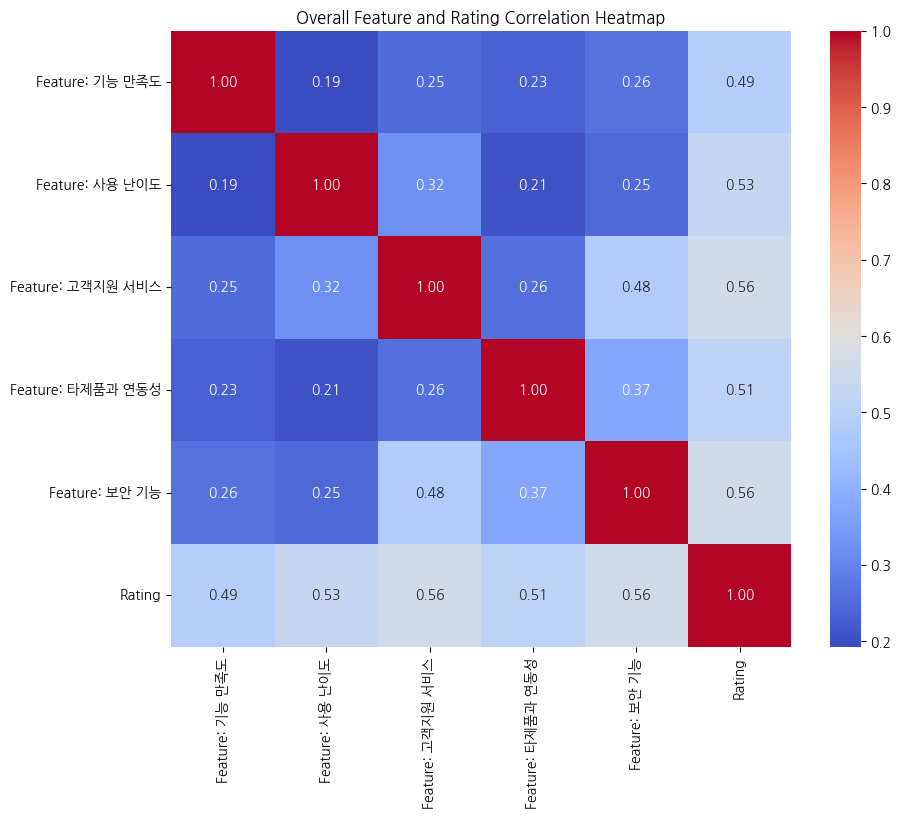

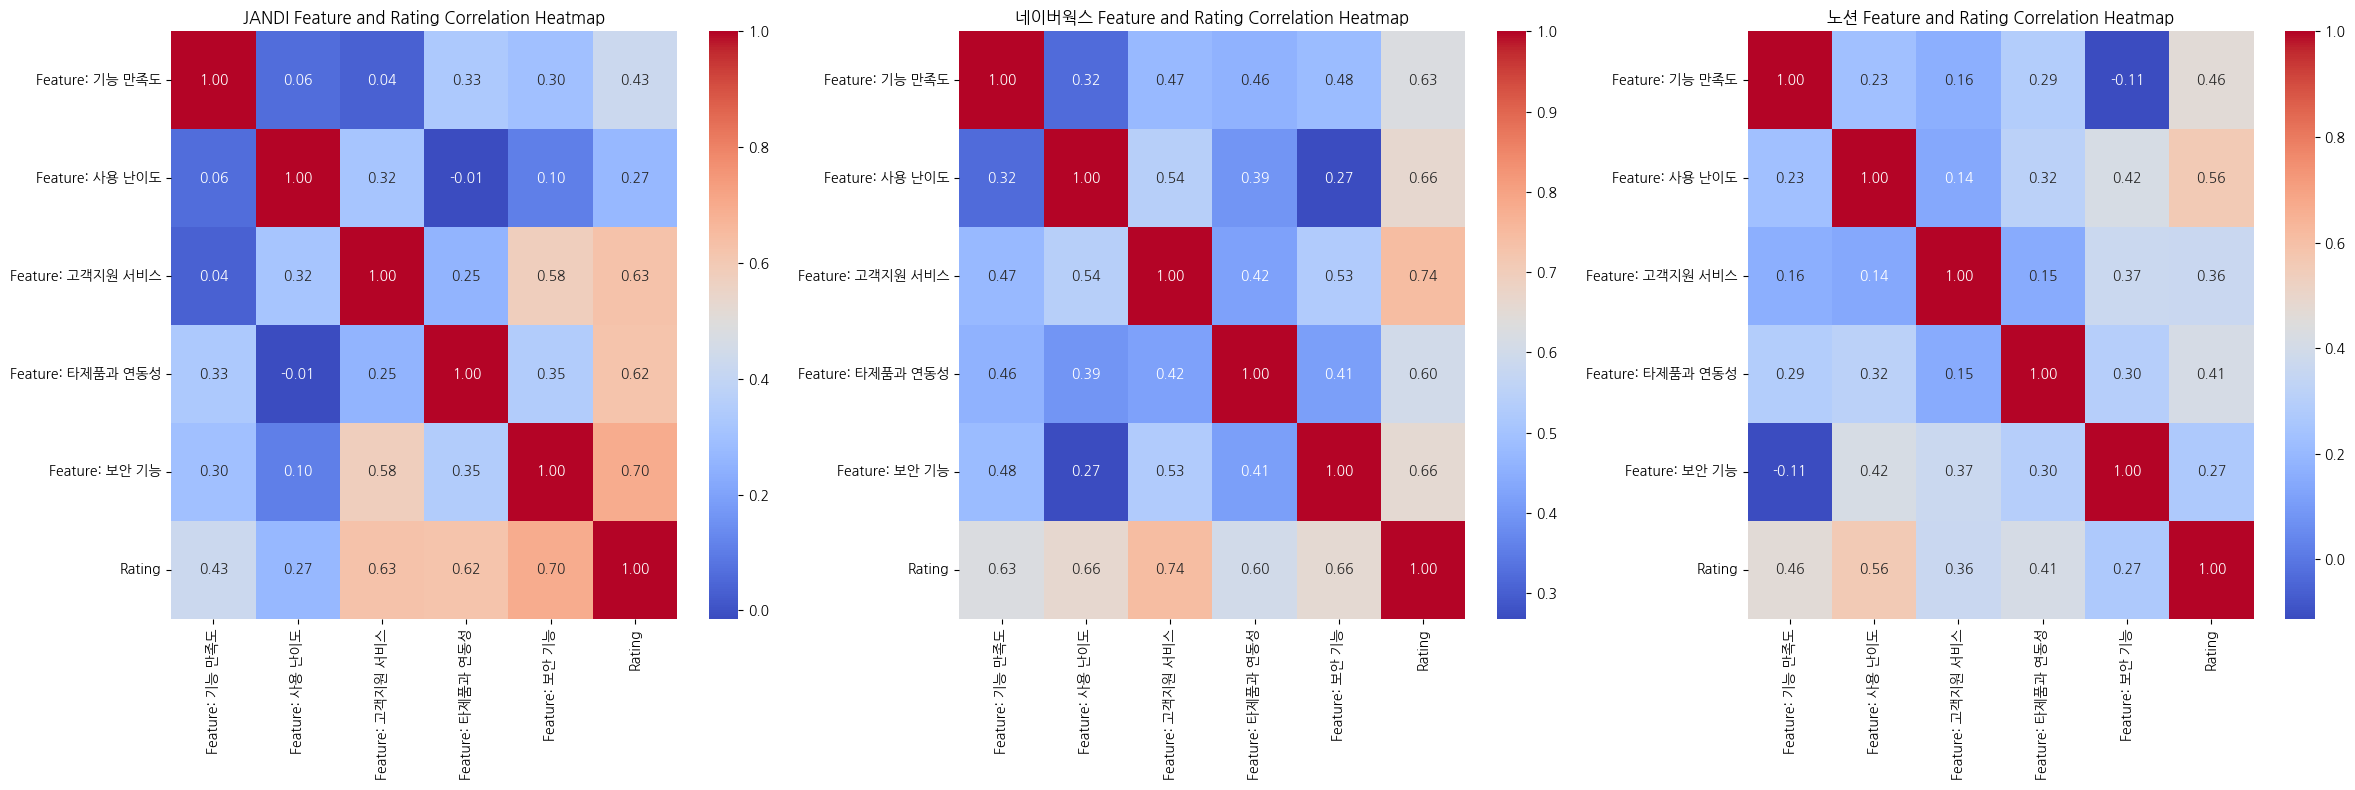

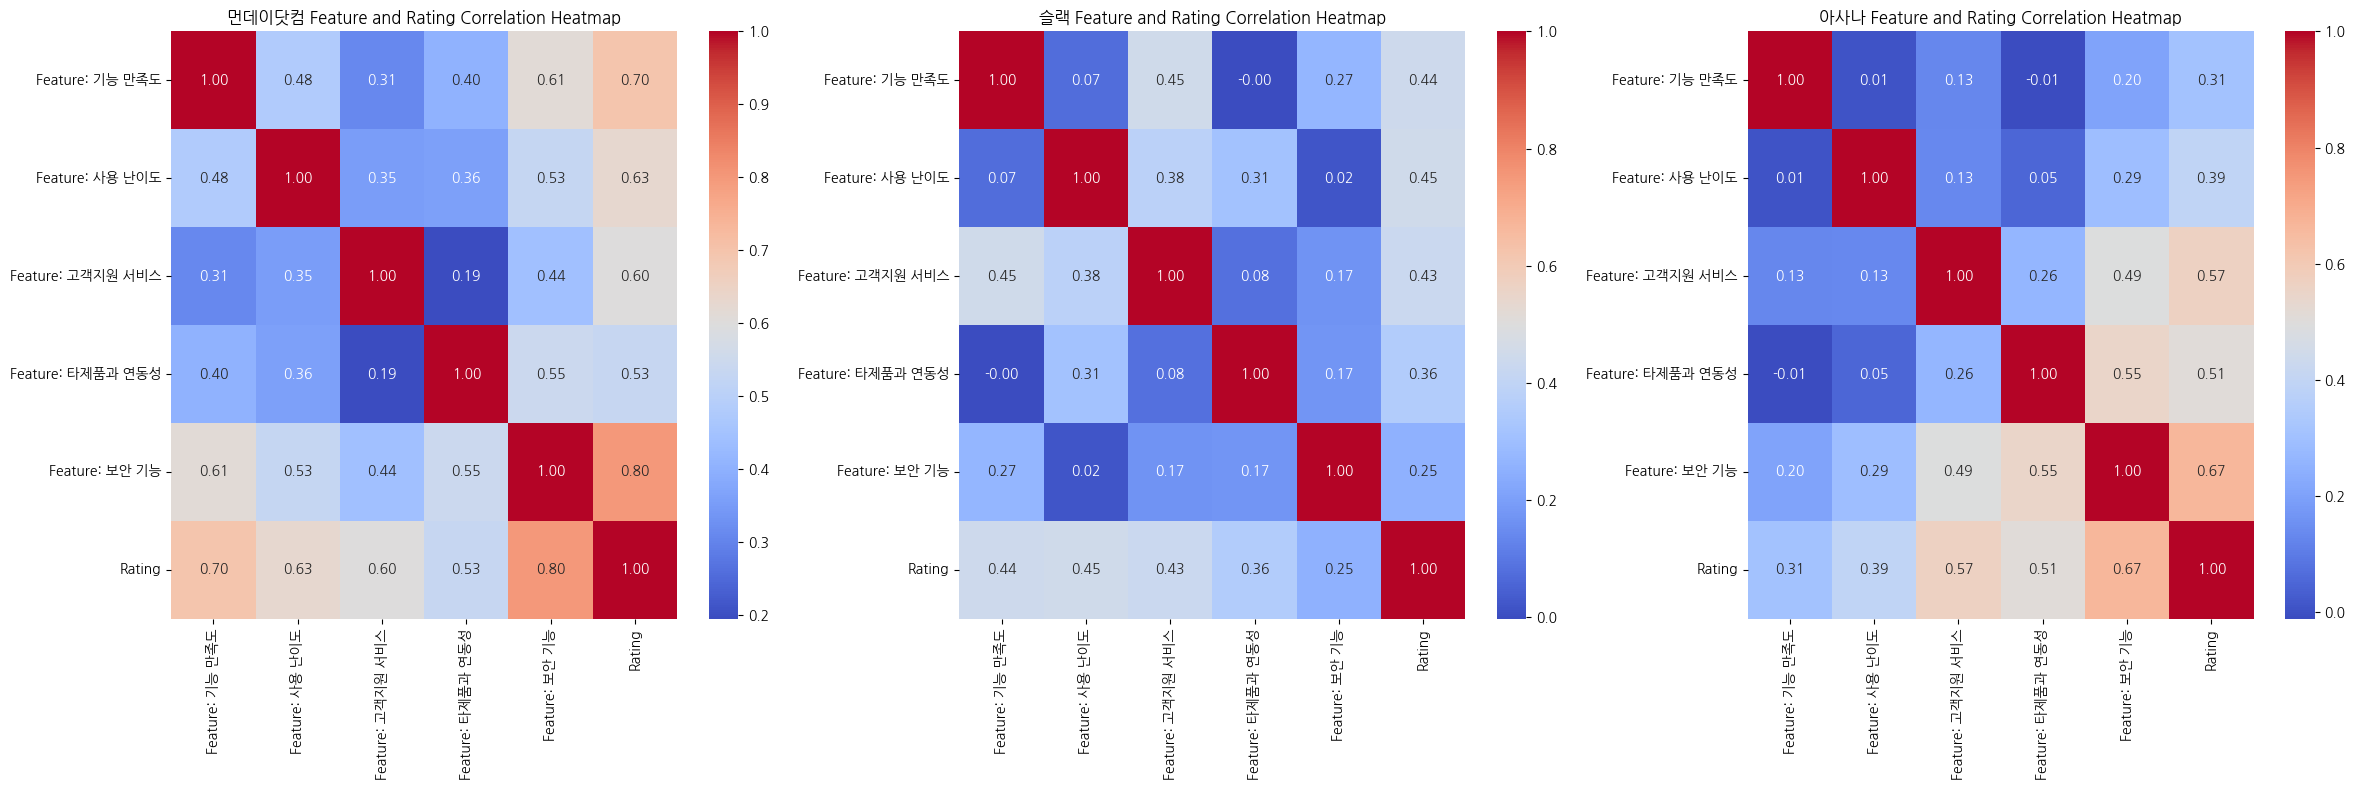

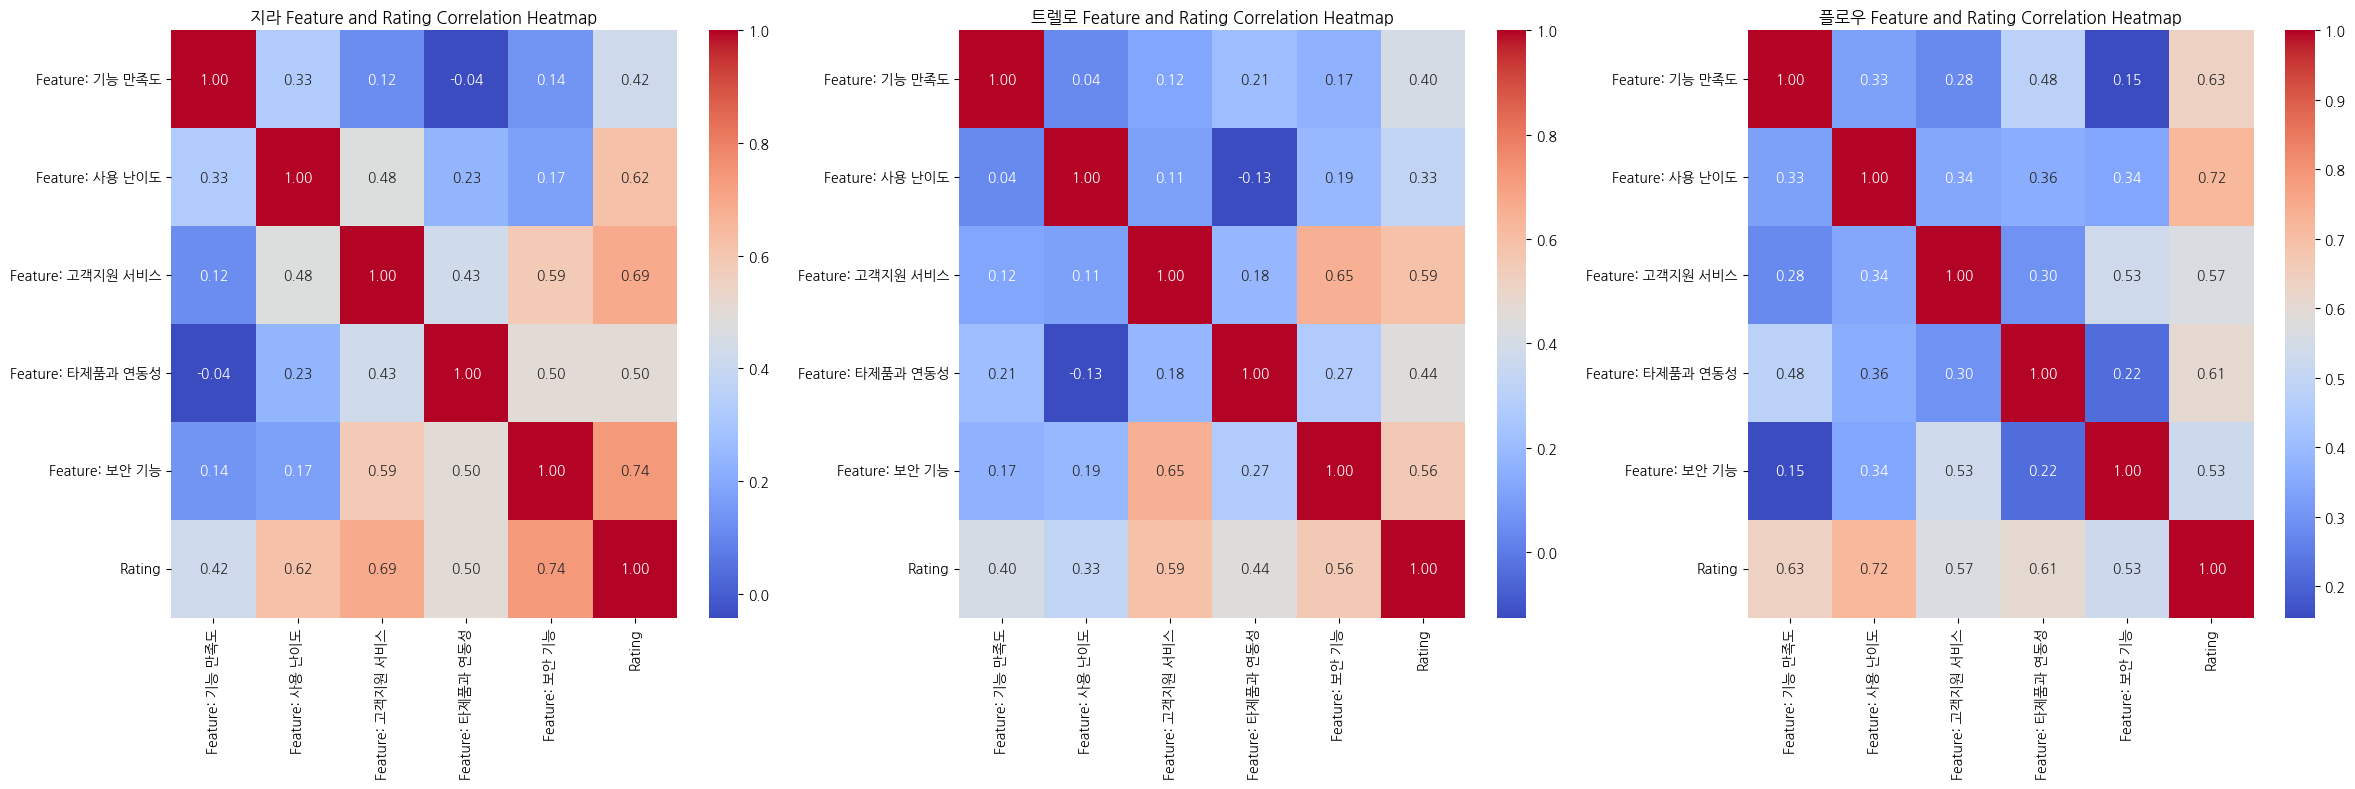

Feature-wise Linear Regression Results:
             Feature  Coefficient  Intercept        R2
0    Feature: 기능 만족도     0.322378   5.341384  0.237310
1    Feature: 사용 난이도     0.358240   5.086904  0.282592
2  Feature: 고객지원 서비스     0.356319   5.487989  0.310377
3  Feature: 타제품과 연동성     0.323641   5.503155  0.258228
4     Feature: 보안 기능     0.365236   5.297626  0.308952


In [34]:
# Feature와 Rating 의 상관관계 히트맵 분석
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

# Load and clean data
data_path = 'all_reviews_with_mapping.csv'
data = pd.read_csv(data_path)
features = [
    "Feature: 기능 만족도",
    "Feature: 사용 난이도",
    "Feature: 고객지원 서비스",
    "Feature: 타제품과 연동성",
    "Feature: 보안 기능"
]
target = "Rating"

# Drop missing values
data_cleaned = data.dropna(subset=features + [target])

# Part 1: Overall correlation heatmap
# Compute overall correlation matrix
overall_correlation_matrix = data_cleaned[features + [target]].corr()

# Plot overall heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overall_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Overall Feature and Rating Correlation Heatmap')
plt.show()

# Part 2: SaaS-specific heatmaps
# Group by SaaS Name and calculate mean values
grouped_data = data_cleaned.groupby('SaaS')
saas_names = list(grouped_data.groups.keys())
num_saas = len(saas_names)
chunks = math.ceil(num_saas / 3)

for i in range(chunks):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    for j in range(3):
        idx = i * 3 + j
        if idx < num_saas:
            saas_name = saas_names[idx]
            group = grouped_data.get_group(saas_name)
            if group.shape[0] > 1:  # Ensure there are enough data points for correlation
                correlation_matrix = group[features + [target]].corr()
                sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[j])
                axes[j].set_title(f'{saas_name} Feature and Rating Correlation Heatmap')
            else:
                axes[j].axis('off')  # Turn off subplot if not enough data
        else:
            axes[j].axis('off')  # Turn off subplot if no more SaaS
    plt.tight_layout()
    plt.show()

# Initialize results storage
coefficients = []

# Analyze each feature's effect on Rating
for feature in features:
    X = data_cleaned[[feature]]
    y = data_cleaned[target]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    coefficients.append({
        "Feature": feature,
        "Coefficient": model.coef_[0],
        "Intercept": model.intercept_,
        "R2": r2
    })

coefficients_df = pd.DataFrame(coefficients)

# Display results
print("Feature-wise Linear Regression Results:")
print(coefficients_df)


1. 전체 키워드 분석
- 각 Saas 의 핵심을 알 수 있음
- 전체 키워드가 많이 겹친다면 유사한 서비스를 제공하는 것으로 판단

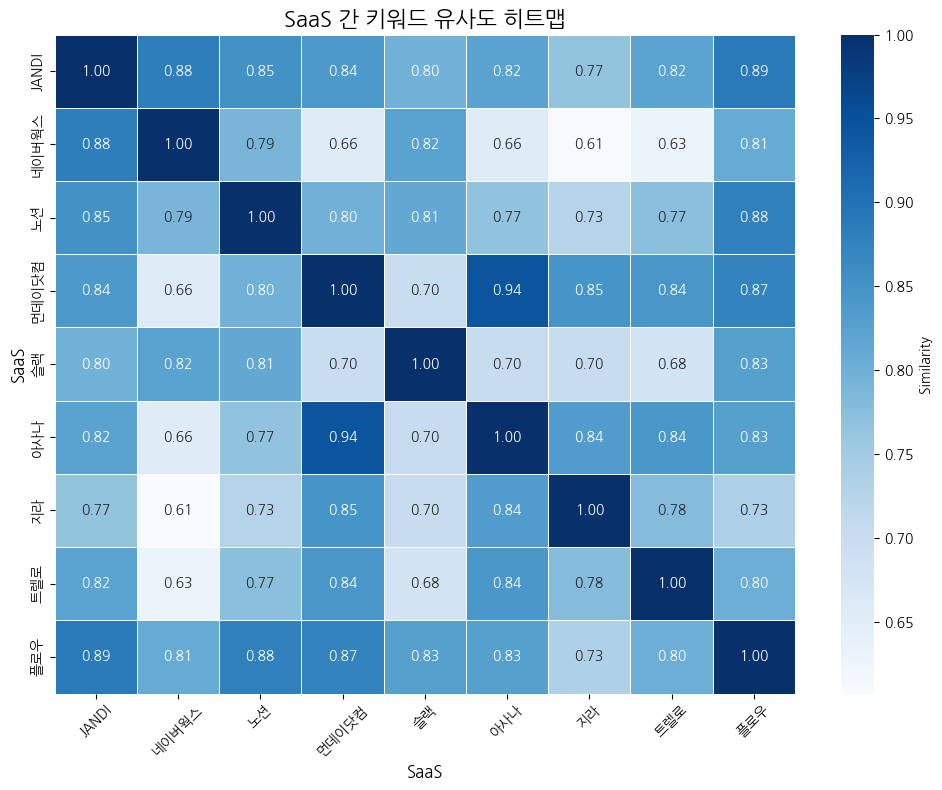

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'top_7_unique_saas_keywords_by_category.csv'
data = pd.read_csv(file_path)

# 중복 조합 처리: Keyword-SaaS 조합별 Frequency 합계 계산
grouped_data = data.groupby(['Keyword', 'SaaS'], as_index=False).agg({'Frequency': 'sum'})

# 피벗테이블 생성 (키워드 기준으로 SaaS와 빈도 연결)
pivot_data = grouped_data.pivot(index='Keyword', columns='SaaS', values='Frequency').fillna(0)

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(pivot_data.T)

# SaaS 이름 가져오기
saas_names = pivot_data.columns

# 유사도 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=saas_names, columns=saas_names)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_df,
    annot=True,      # 셀에 값 표시
    fmt=".2f",       # 소수점 두 자리 포맷
    cmap="Blues",    # 색상 팔레트
    linewidths=0.5,  # 셀 경계선
    cbar_kws={"label": "Similarity"}  # 컬러바 라벨
)
plt.title('SaaS 간 키워드 유사도 히트맵', fontsize=16)
plt.xlabel('SaaS', fontsize=12)
plt.ylabel('SaaS', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


2. 유사한 서비스를 기준(2-3개)으로 산업/직업/규모 분석
- 전체 시장 규모는 크나 노션을 많이 사용하지 않는 시장을 타겟

<ipython-input-30-cc3a19c990da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Using Count'] = pd.Categorical(filtered_data['Using Count'], categories=size_order, ordered=True)


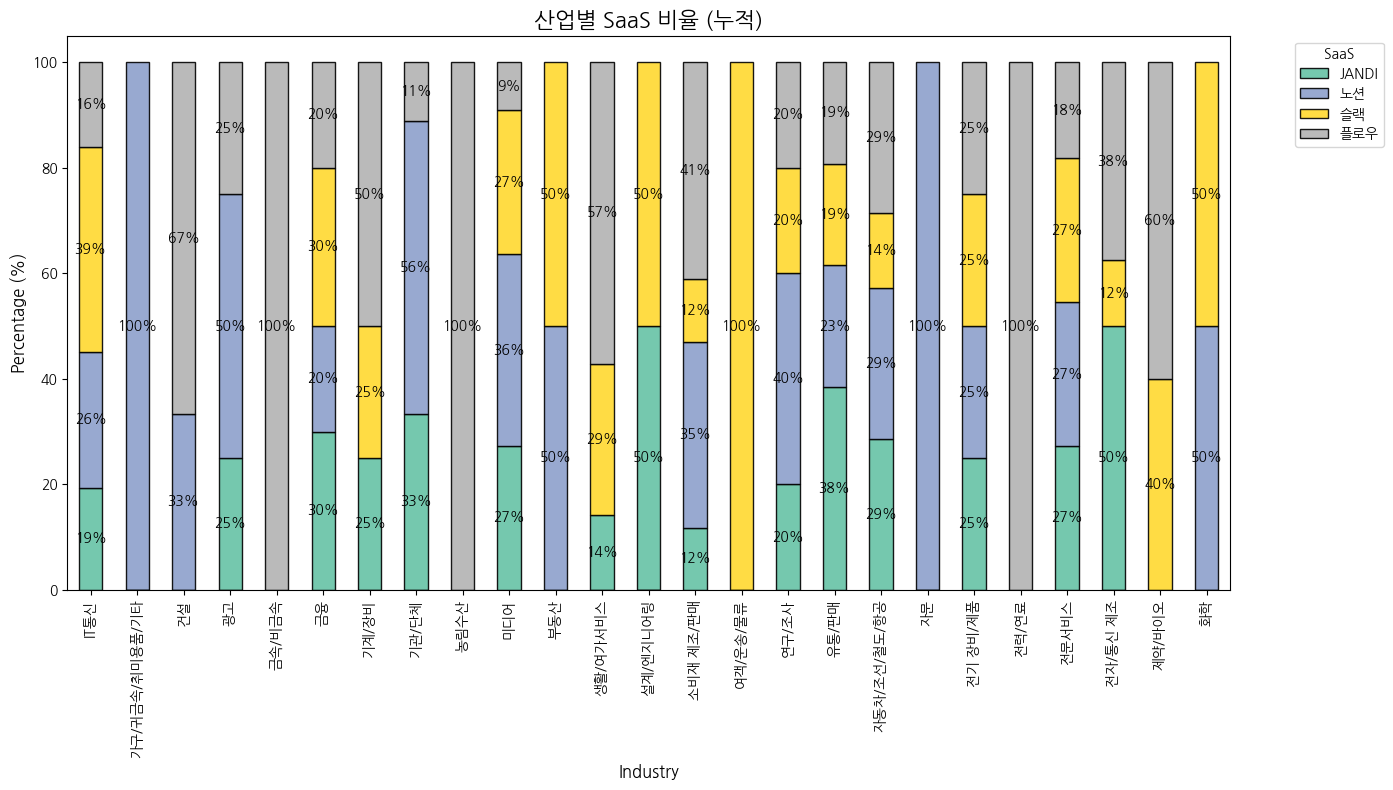

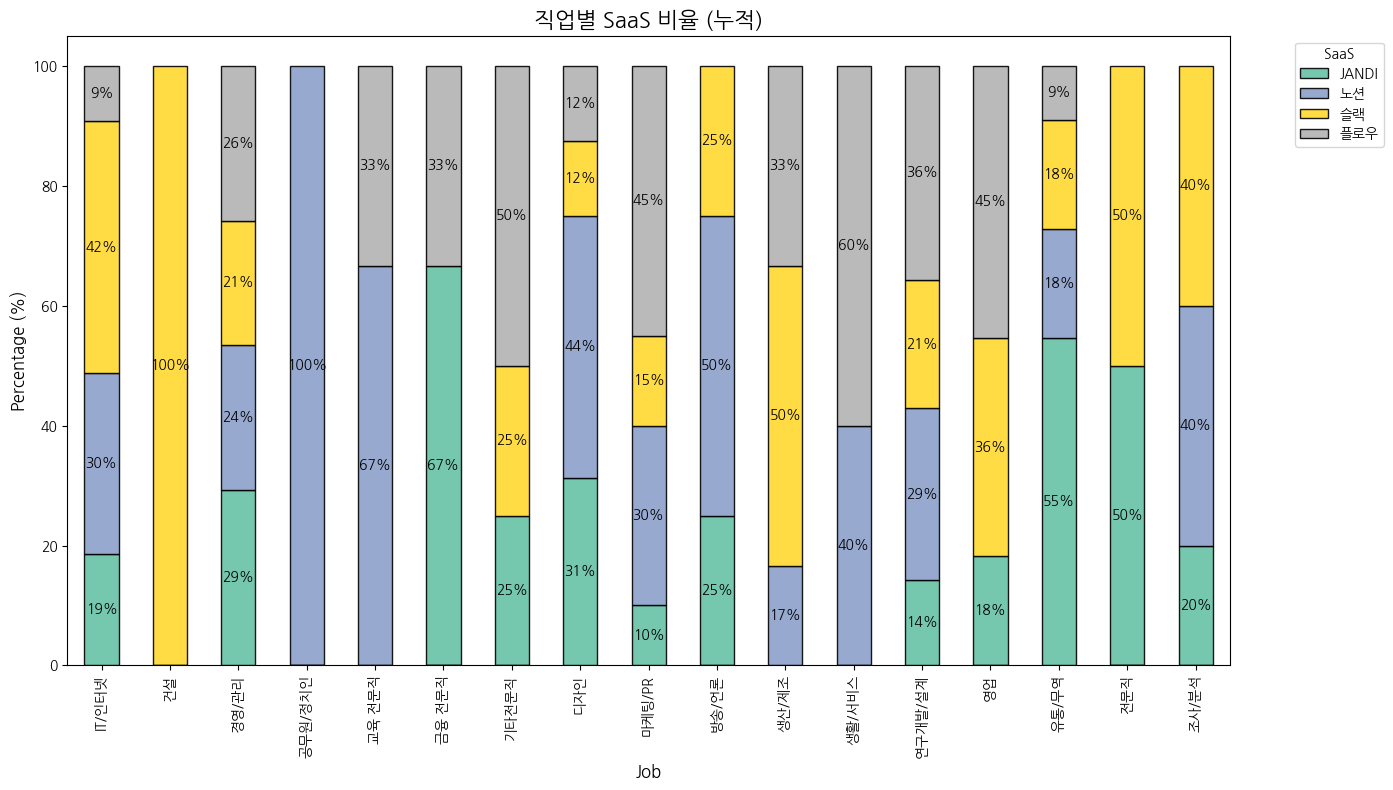

<ipython-input-30-cc3a19c990da>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby(['Using Count', 'SaaS'])


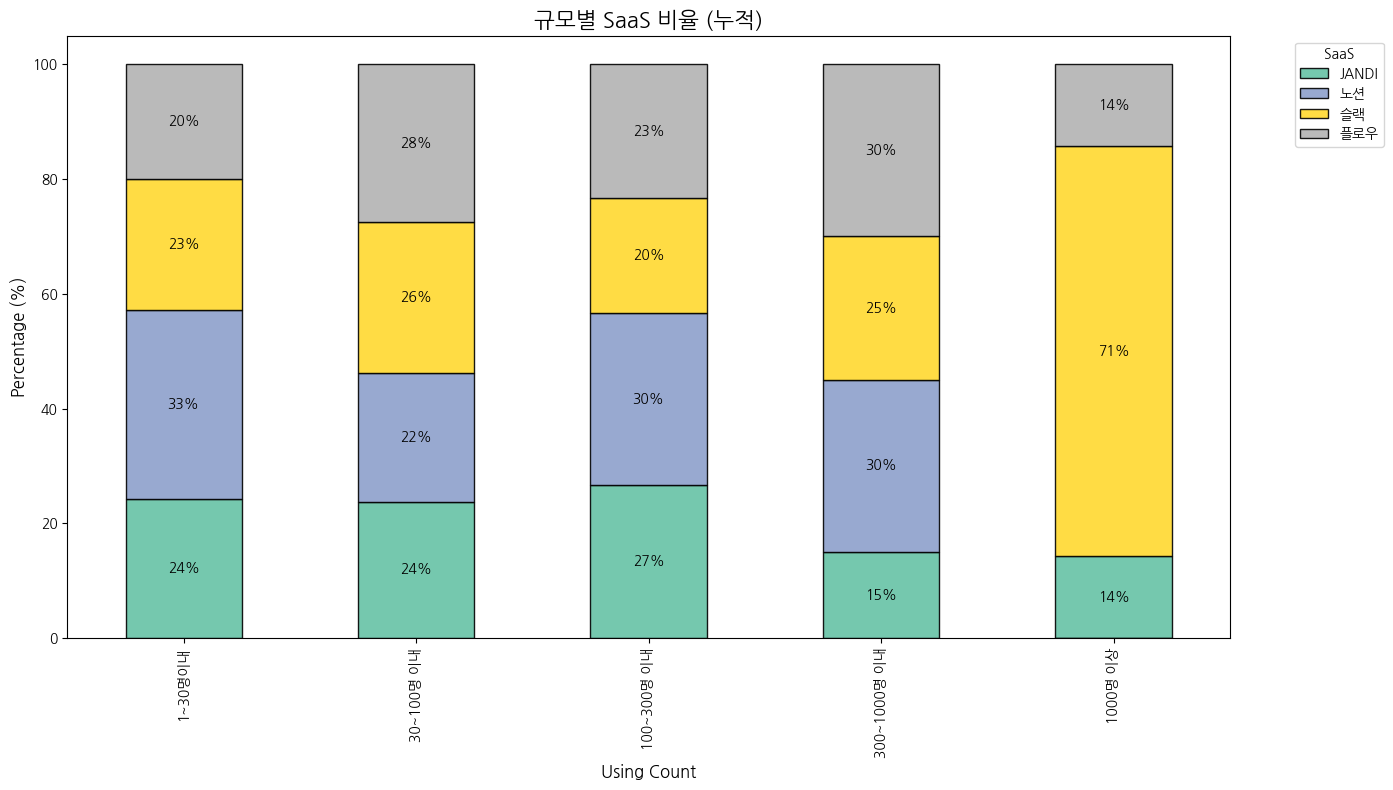

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'
data = pd.read_csv(file_path)

# '잔디'를 'JANDI'로 통합
data['SaaS'] = data['SaaS'].replace('잔디', 'JANDI')

# 분석 대상 SaaS 필터링
target_saas = ['플로우', 'JANDI', '슬랙', '노션']
filtered_data = data[data['SaaS'].isin(target_saas)]

# 규모별 정렬 순서 지정
size_order = ["1~30명이내", "30~100명 이내", "100~300명 이내", "300~1000명 이내", "1000명 이상"]
filtered_data['Using Count'] = pd.Categorical(filtered_data['Using Count'], categories=size_order, ordered=True)

# Stacked Bar Plot 함수
def plot_stacked_bar_with_percentage(pivot_data, title, xlabel, ylabel):
    """누적 막대그래프에 비율 표시"""
    ax = pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        cmap='Set2',
        edgecolor='black',
        alpha=0.9
    )
    # 비율 표시
    for bars in ax.containers:
        ax.bar_label(
            bars,
            labels=[f'{round(v)}%' if v > 0 else '' for v in bars.datavalues],  # 반올림 후 표시
            label_type='center',
            fontsize=10,
            color='black'  # 검은색 텍스트
        )
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title='SaaS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 1. 산업(Industry)별 SaaS 비율
industry_pivot = (
    filtered_data.groupby(['Industry', 'SaaS'])
    .size()
    .reset_index(name='Count')
    .pivot(index='Industry', columns='SaaS', values='Count')
    .fillna(0)
)
industry_pivot_percentage = industry_pivot.div(industry_pivot.sum(axis=1), axis=0) * 100

# 산업별 SaaS 비율 시각화
plot_stacked_bar_with_percentage(industry_pivot_percentage, '산업별 SaaS 비율 (누적)', 'Industry', 'Percentage (%)')

# 2. 직업(Job)별 SaaS 비율
job_pivot = (
    filtered_data.groupby(['Job', 'SaaS'])
    .size()
    .reset_index(name='Count')
    .pivot(index='Job', columns='SaaS', values='Count')
    .fillna(0)
)
job_pivot_percentage = job_pivot.div(job_pivot.sum(axis=1), axis=0) * 100

# 직업별 SaaS 비율 시각화
plot_stacked_bar_with_percentage(job_pivot_percentage, '직업별 SaaS 비율 (누적)', 'Job', 'Percentage (%)')

# 3. 규모(Using Count)별 SaaS 비율
count_pivot = (
    filtered_data.groupby(['Using Count', 'SaaS'])
    .size()
    .reset_index(name='Count')
    .pivot(index='Using Count', columns='SaaS', values='Count')
    .fillna(0)
)
count_pivot_percentage = count_pivot.div(count_pivot.sum(axis=1), axis=0) * 100

# 규모별 SaaS 비율 시각화
plot_stacked_bar_with_percentage(count_pivot_percentage, '규모별 SaaS 비율 (누적)', 'Using Count', 'Percentage (%)')


3. 타겟의 리뷰 키워드 분석

- 장/단점 확인하여 key point 찾기

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'all_reviews_with_mapping.csv'
data = pd.read_csv(file_path)

# '잔디'를 'JANDI'로 통합
data['SaaS'] = data['SaaS'].replace('잔디', 'JANDI')

# 필터 조건 정의
industry_filter = ['IT통신', '건설', '금융', '유통/판매']
job_filter = ['IT/인터넷', '경영/관리', '마케팅/PR', '생산/제조', '생활/서비스', '연구개발/설계']
size_filter = ['30~100명 이내']

# 조건에 맞는 데이터 필터링
filtered_data = data[
    (data['Industry'].isin(industry_filter)) &
    (data['Job'].isin(job_filter)) &
    (data['Using Count'].isin(size_filter))
]

# 결과 저장
output_file = 'filtered_data.csv'
filtered_data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"필터링된 데이터가 '{output_file}'로 저장되었습니다.")


필터링된 데이터가 'filtered_data.csv'로 저장되었습니다.


In [6]:
import pandas as pd

# 파일 경로
file_path = 'filtered_data.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# 결측값을 'n/a'로 대체
data = data.fillna('n/a')

# 수정된 데이터를 저장 (utf-8-sig로 인코딩 설정)
data.to_csv('filtered_data_with_na.csv', index=False, encoding='utf-8-sig')

print("결측값 처리된 파일이 저장되었습니다: filtered_data_with_na.csv")


결측값 처리된 파일이 저장되었습니다: filtered_data_with_na.csv


In [40]:
from collections import Counter
from konlpy.tag import Okt
import pandas as pd

# 불용어 리스트 정의
stopwords = {"시", "하다", "것", "및", "있다", "수", "되다", "점", "등", "가장", "때", "의", "이다", "더", "계", "볼", "알", "간", "옆"}

# 키워드 추출 및 그룹화 함수
def extract_keywords_with_patterns(text, patterns, okt):
    if pd.isna(text):
        return []
    words = okt.pos(text, norm=True, stem=True)
    extracted = []
    for pattern in patterns:
        if len(pattern) == 1:  # 단일 품사
            extracted += [w[0] for w in words if w[1] == pattern[0] and w[0] not in stopwords]
        else:  # 두 개 품사 조합 (순차적으로 나오는 경우만)
            for i in range(len(words) - len(pattern) + 1):
                word_comb = [w[0] for w in words[i:i + len(pattern)]]
                pos_comb = tuple([w[1] for w in words[i:i + len(pattern)]])
                if pos_comb == pattern and all(word not in stopwords for word in word_comb):
                    extracted.append(" ".join(word_comb))
    return extracted

# 그룹화 패턴 정의 (동사+동사 제외)
patterns = [
    ("Noun", "Noun"),       # 명사+명사
    ("Adjective", "Noun"),  # 형용사+명사
    ("Noun", "Verb"),       # 명사+동사
    ("Adjective", "Verb"),  # 형용사+동사
    ("Noun",),              # 명사
    ("Verb",),              # 동사
    ("Adjective",)          # 형용사
]

# 데이터에 키워드 추가
okt = Okt()

data["Pros_Keywords"] = data["Pros"].apply(lambda x: extract_keywords_with_patterns(x, patterns, okt))
data["Cons_Keywords"] = data["Cons"].apply(lambda x: extract_keywords_with_patterns(x, patterns, okt))
data["Comment_Keywords"] = data["Comment"].apply(lambda x: extract_keywords_with_patterns(x, patterns, okt))

# 빈도 데이터 생성 함수
def create_frequency_table(data, saas_column, keyword_column, category_name):
    rows = []
    for saas_id, group in data.groupby(saas_column):
        keywords = group[keyword_column].dropna().sum()
        keyword_counts = Counter(keywords)
        for keyword, frequency in keyword_counts.items():
            rows.append({"SaaS": saas_id, "Category": category_name, "Keyword": keyword, "Frequency": frequency})
    return pd.DataFrame(rows)

# 각 카테고리별 빈도 데이터 생성
pros_freq = create_frequency_table(data, "SaaS ID", "Pros_Keywords", "Pros")
cons_freq = create_frequency_table(data, "SaaS ID", "Cons_Keywords", "Cons")
comment_freq = create_frequency_table(data, "SaaS ID", "Comment_Keywords", "Comments")

# 모든 데이터를 병합
final_freq = pd.concat([pros_freq, cons_freq, comment_freq], axis=0)

# 결과 저장
output_file = "saas_category_keyword_frequency_filtered.csv"
final_freq.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"불용어 처리 및 키워드 빈도 분석 결과가 '{output_file}'에 저장되었습니다.")


불용어 처리 및 키워드 빈도 분석 결과가 'saas_category_keyword_frequency_filtered.csv'에 저장되었습니다.


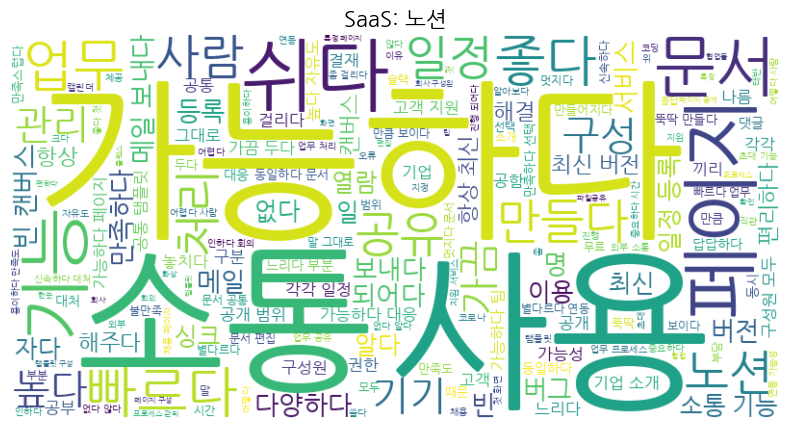

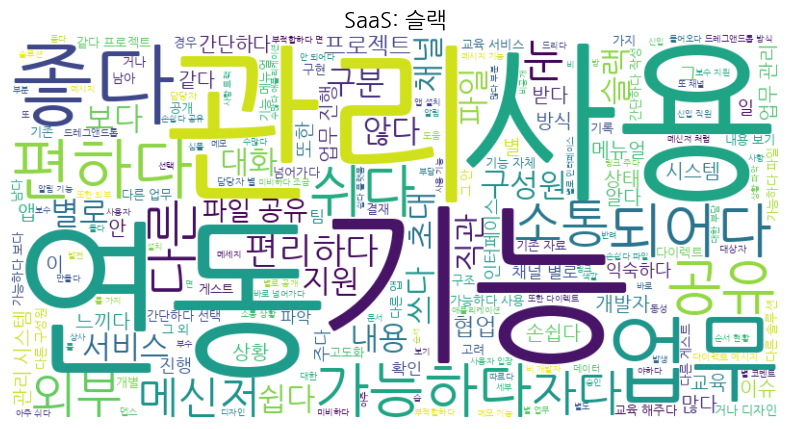

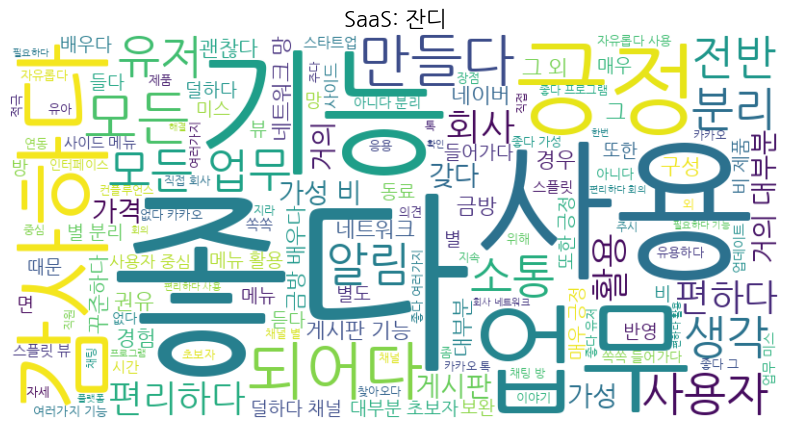

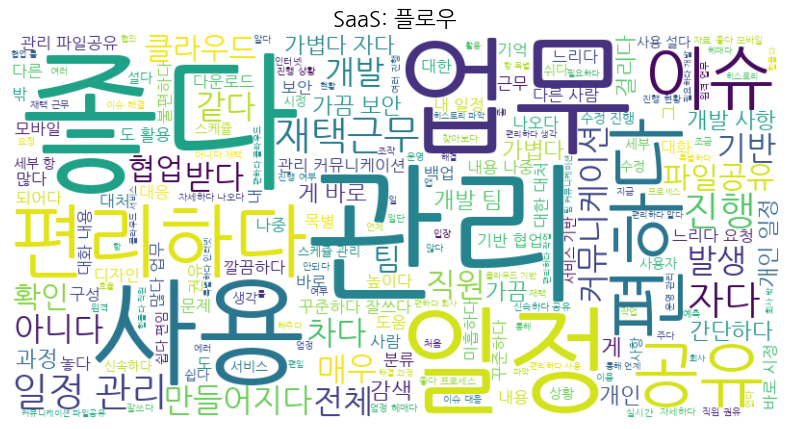

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드
file_path = 'saas_category_keyword_frequency_filtered.csv'  # 업로드한 CSV 파일 경로
data = pd.read_csv(file_path)

# SaaS ID와 이름 매핑
saas_mapping = {
    191: "노션",
    358: "슬랙",
    213: "플로우",
    206: "잔디"
}

# SaaS 이름으로 대치
data["SaaS"] = data["SaaS"].replace(saas_mapping)

# 한글 폰트 경로 설정 (사용자가 업로드한 폰트 경로)
font_path = 'NanumGothic.ttf'  # 업로드된 한글 폰트 파일 경로

# SaaS별 워드 클라우드 생성 함수
def display_saas_wordclouds(data, font_path):
    for saas_name, group in data.groupby("SaaS"):
        # 키워드와 빈도 통합
        keywords = group.groupby("Keyword")["Frequency"].sum().to_dict()

        # 워드 클라우드 생성
        wordcloud = WordCloud(
            font_path=font_path,  # 업로드된 한글 폰트 경로
            background_color="white",
            width=800,
            height=400
        ).generate_from_frequencies(keywords)

        # 워드 클라우드 시각화
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"SaaS: {saas_name}", fontsize=16)
        plt.show()

# 실행: SaaS별 워드 클라우드 시각화
display_saas_wordclouds(data, font_path)
